# Linear Regression Consulting Project

Congratulations! You've been contracted by Hyundai Heavy Industries to help them build a predictive model for some ships. [Hyundai Heavy Industries](http://www.hyundai.eu/en) is one of the world's largest ship manufacturing companies and builds cruise liners.

You've been flown to their headquarters in Ulsan, South Korea to help them give accurate estimates of how many crew members a ship will require.

They are currently building new ships for some customers and want you to create a model and use it to predict how many crew members the ships will need.

Here is what the data looks like so far:

    Description: Measurements of ship size, capacity, crew, and age for 158 cruise
    ships.


    Variables/Columns
    Ship Name     1-20
    Cruise Line   21-40
    Age (as of 2013)   46-48
    Tonnage (1000s of tons)   50-56
    passengers (100s)   58-64
    Length (100s of feet)  66-72
    Cabins  (100s)   74-80
    Passenger Density   82-88
    Crew  (100s)   90-96
    
It is saved in a csv file for you called "cruise_ship_info.csv". Your job is to create a regression model that will help predict how many crew members will be needed for future ships. The client also mentioned that they have found that particular cruise lines will differ in acceptable crew counts, so it is most likely an important feature to include in your analysis! 

Once you've created the model and tested it for a quick check on how well you can expect it to perform, make sure you take a look at why it performs so well!

In [3]:
from pyspark.sql import SparkSession

In [5]:
spark=SparkSession.builder.appName('project').getOrCreate()

In [8]:
data=spark.read.csv('cruise_ship_info.csv',header=True,inferSchema=True)

In [9]:
data.printSchema()

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)



In [10]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

/home/swap9047/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [11]:
data.columns

['Ship_name',
 'Cruise_line',
 'Age',
 'Tonnage',
 'passengers',
 'length',
 'cabins',
 'passenger_density',
 'crew']

In [14]:
assemble=VectorAssembler(inputCols=['Age','Tonnage','passengers','length','cabins','passenger_density'],outputCol='features')
output=assemble.transform(data)

In [16]:
output.printSchema()
finaldata=output.select('features','crew')
train_data,test_data=finaldata.randomSplit([0.7,0.3])

root
 |-- Ship_name: string (nullable = true)
 |-- Cruise_line: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tonnage: double (nullable = true)
 |-- passengers: double (nullable = true)
 |-- length: double (nullable = true)
 |-- cabins: double (nullable = true)
 |-- passenger_density: double (nullable = true)
 |-- crew: double (nullable = true)
 |-- features: vector (nullable = true)



In [18]:
lr=LinearRegression(labelCol='crew')
lr_model=lr.fit(train_data)
test_result=lr_model.evaluate(test_data)

In [19]:
test_result.r2

0.902816060078294

In [20]:
test_result.rootMeanSquaredError

1.188988931015132

In [23]:
test_data.describe().show()

+-------+------------------+
|summary|              crew|
+-------+------------------+
|  count|                49|
|   mean| 7.515918367346937|
| stddev|3.8535232354989915|
|    min|              0.59|
|    max|              19.1|
+-------+------------------+



In [25]:

features = data.rdd.map(lambda row: row[2:])

from pyspark.mllib.stat import Statistics

corr_mat=Statistics.corr(features, method="pearson")


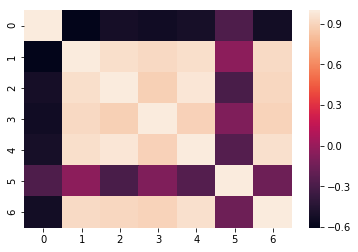

In [29]:
import seaborn as sns
sns.heatmap(corr_mat)

In [38]:
lst=[]
for i in corr_mat:
    lst.extend(i)
lst=np.array(lst)
lst.reshape((7,-1))

array([[ 1.        , -0.60664609, -0.51554228, -0.53228589, -0.51001903,
        -0.2788302 , -0.5306565 ],
       [-0.60664609,  1.        ,  0.9450614 ,  0.92236832,  0.94876357,
        -0.04084624,  0.92756881],
       [-0.51554228,  0.9450614 ,  1.        ,  0.88353479,  0.97634137,
        -0.29486708,  0.91523413],
       [-0.53228589,  0.92236832,  0.88353479,  1.        ,  0.88979821,
        -0.09048847,  0.89585663],
       [-0.51001903,  0.94876357,  0.97634137,  0.88979821,  1.        ,
        -0.25318074,  0.95082261],
       [-0.2788302 , -0.04084624, -0.29486708, -0.09048847, -0.25318074,
         1.        , -0.15550928],
       [-0.5306565 ,  0.92756881,  0.91523413,  0.89585663,  0.95082261,
        -0.15550928,  1.        ]])

In [31]:
import numpy as np
np.matrix(corr_mat)

matrix([[ 1.        , -0.60664609, -0.51554228, -0.53228589, -0.51001903,
         -0.2788302 , -0.5306565 ],
        [-0.60664609,  1.        ,  0.9450614 ,  0.92236832,  0.94876357,
         -0.04084624,  0.92756881],
        [-0.51554228,  0.9450614 ,  1.        ,  0.88353479,  0.97634137,
         -0.29486708,  0.91523413],
        [-0.53228589,  0.92236832,  0.88353479,  1.        ,  0.88979821,
         -0.09048847,  0.89585663],
        [-0.51001903,  0.94876357,  0.97634137,  0.88979821,  1.        ,
         -0.25318074,  0.95082261],
        [-0.2788302 , -0.04084624, -0.29486708, -0.09048847, -0.25318074,
          1.        , -0.15550928],
        [-0.5306565 ,  0.92756881,  0.91523413,  0.89585663,  0.95082261,
         -0.15550928,  1.        ]])